In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head(n=10)

df.shape #Descobrir a quantidade de linhas e colunas

df[df['default'] == 0].shape #Filtrei o dataframe, onde 0 são os clientes adimplentes
df[df['default'] ==1].shape #Mesmo coisa para os inadimplentes, que são representados pelo número 1

qtd_total, _ = df.shape #Proporção entre clientes adimplentes e inadimplentes
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


In [3]:
df.head(n=5)
df.dtypes #Tipo de dado
df.select_dtypes('object').describe().transpose() #Atributos categóricos e quais categorias são predominantes.
#Iremos tratar adiante os dados faltantes das colunas de escolaridade, estado_civil e salário anual.
df.drop('id', axis=1).select_dtypes('number').describe().transpose() #Nesse método, todas as colunas estão preenchidas corretamente.

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [5]:
df.head()        

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [7]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [9]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [15]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [13]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [17]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Conclusão 01: Como as porcentagens se mantém praticamente igual nos dois grupos, irei excluir as linhas com dados faltando, pois não terá um impacto tão grande na analise. Caso um dos grupos tivesse muito mais dados incomletos que outro, seguiria com uma outra abordagem.


In [20]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [24]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [26]:
fn = lambda valor: float(valor.replace('.', '').replace(',', '.'))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '4.716,22']
[12691.51, 8256.96, 3418.56, 4716.22]


In [28]:
# Com a função lambda de limpeza pronta, atribuida pela função "fn", basta aplica-la nas colunas de valor_transacoes_12m e limite_credito.
# Usei propriamente o python puro, através do método apply...

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [30]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [32]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [34]:
df.dropna(inplace=True) #Joguei fora qualquer linha que contém algum dado "Na" (faltante)

In [36]:
df.shape #Quantas linhas temos de dados completos. Excluí aproximadamente 30% da base

(7081, 16)

In [ ]:
df[df['default'] == 0].shape #Quantas linhas temos de dados de clientes adimplentes

In [38]:
df[df['default'] == 1].shape #Quantas linhas temos de dados de clientes inadimplentes

(1113, 16)

In [40]:
# Nova proporção:

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo,_ = df[df['default'] == 1].shape

print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid') #Setei um estilo simples e visual.

df_adimplentes = df[df['default'] == 0]
df_inadimplentes = df[df['default'] == 1]

In [44]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


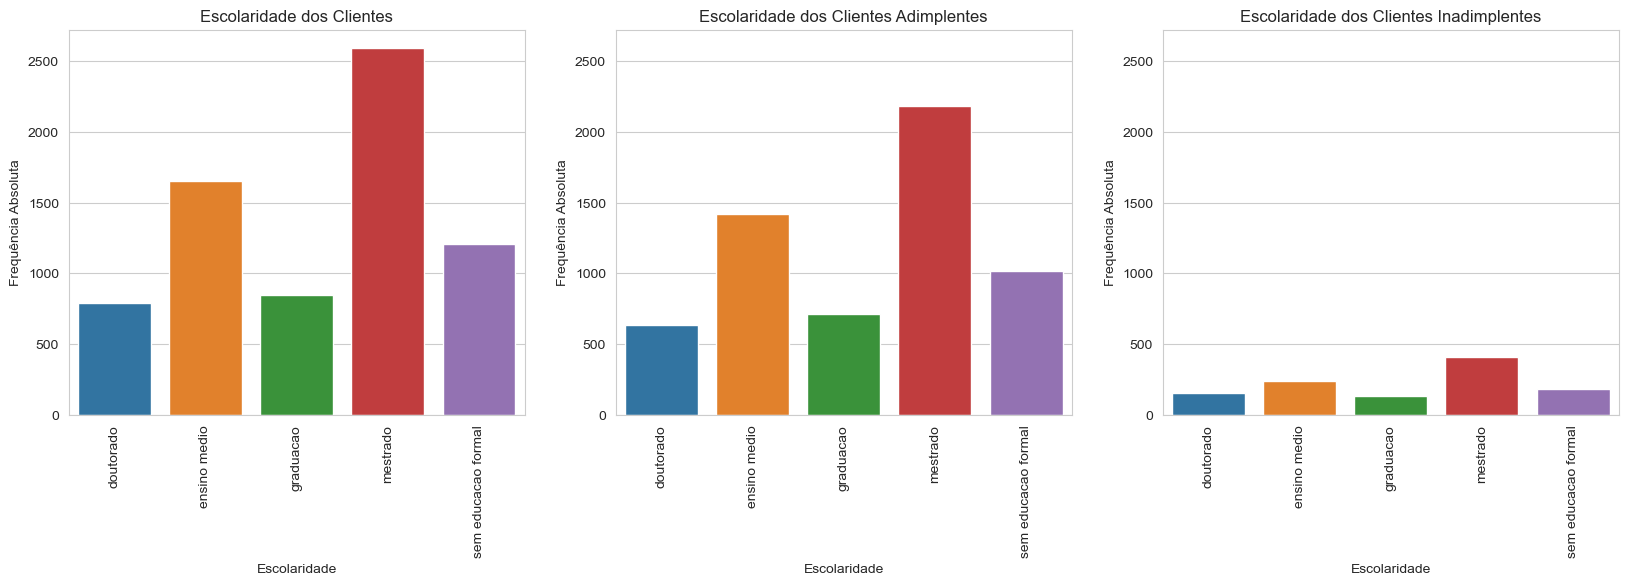

In [46]:
# Escolaridade:

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplentes, df_inadimplentes]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Podemos perceber uma diferença sutil entre os grupos "doutorado" e "graduação" nos gráficos de Clientes Adimplentes de de Clientes Inadimplentes. Chego a conclusão de que olhar para a escolaridade não ajuda a explicar a inadimplencia. Logo, irei descartar essa variável.


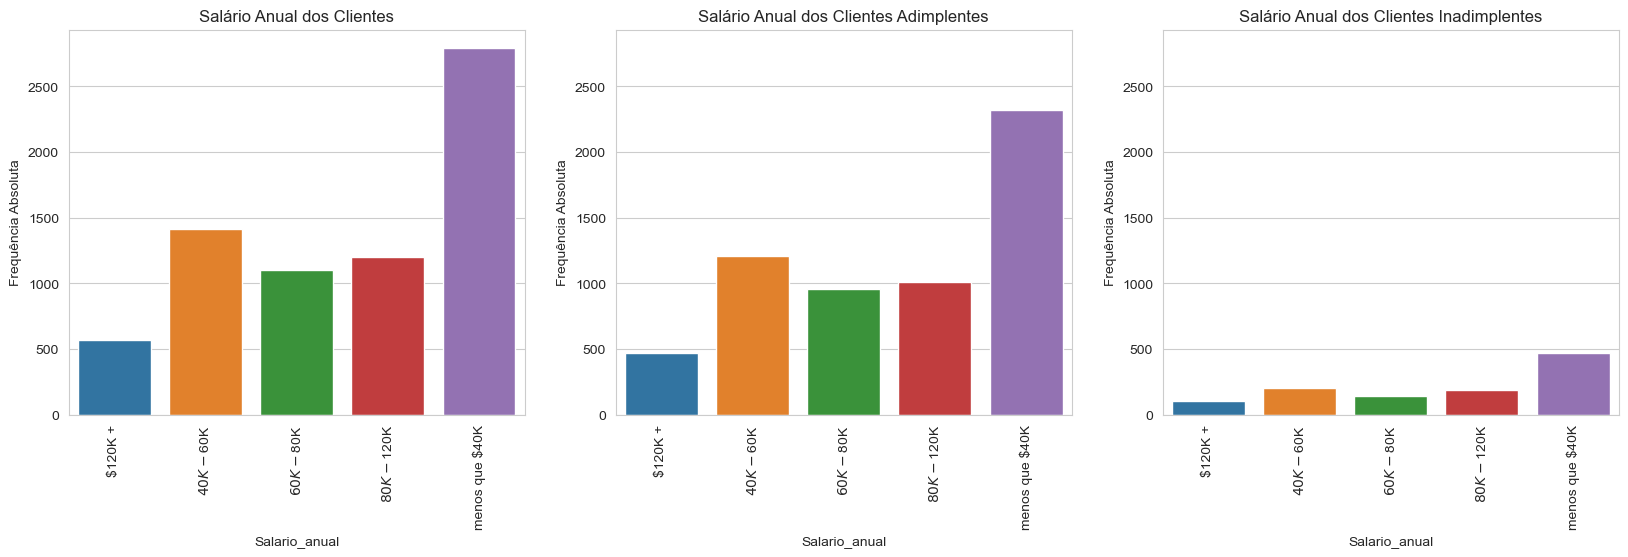

In [49]:
# Salário Anual
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplentes, df_inadimplentes]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

De acordo com os gráfico, notei que o padrão se manteve. Logo, irei descartar o salário anual como indício de inadimplencia.


G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\1513108062.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


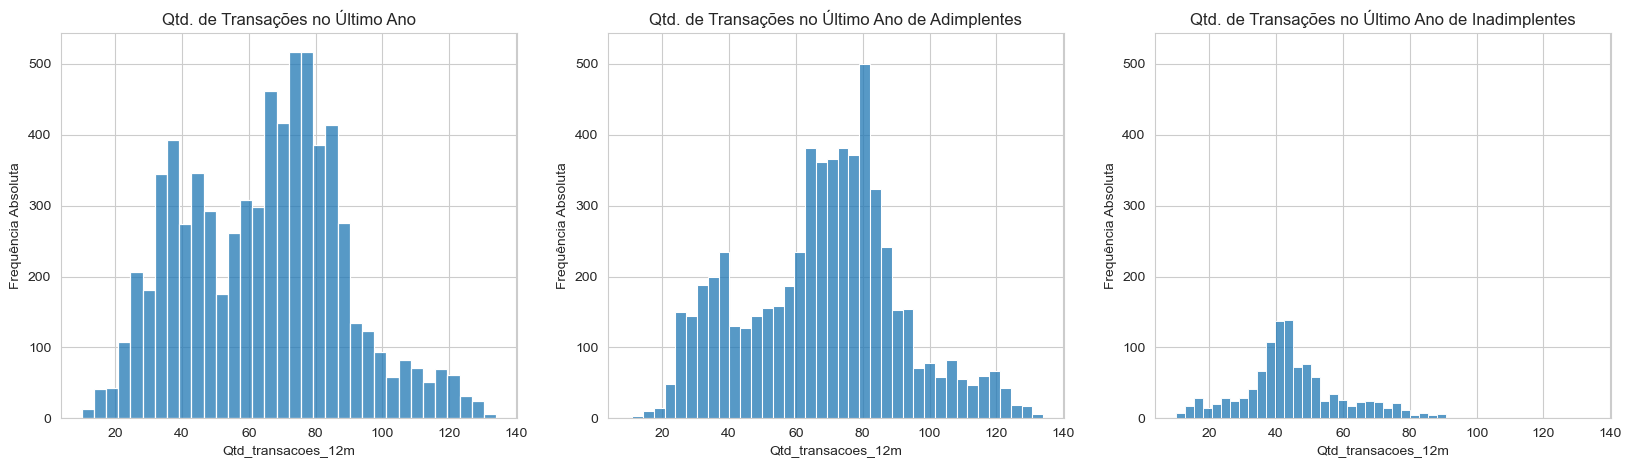

In [52]:
# Visualização categórica

coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Quando setei o parâmetro de transações anuais, consigo extrair e verificar que os clientes entre 20k e 60k são os mais propensos à se tornarem inadimplentes. Irei veriifcar se o valor das transações também tem correlação com a inadimplencia:

G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\4286365284.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


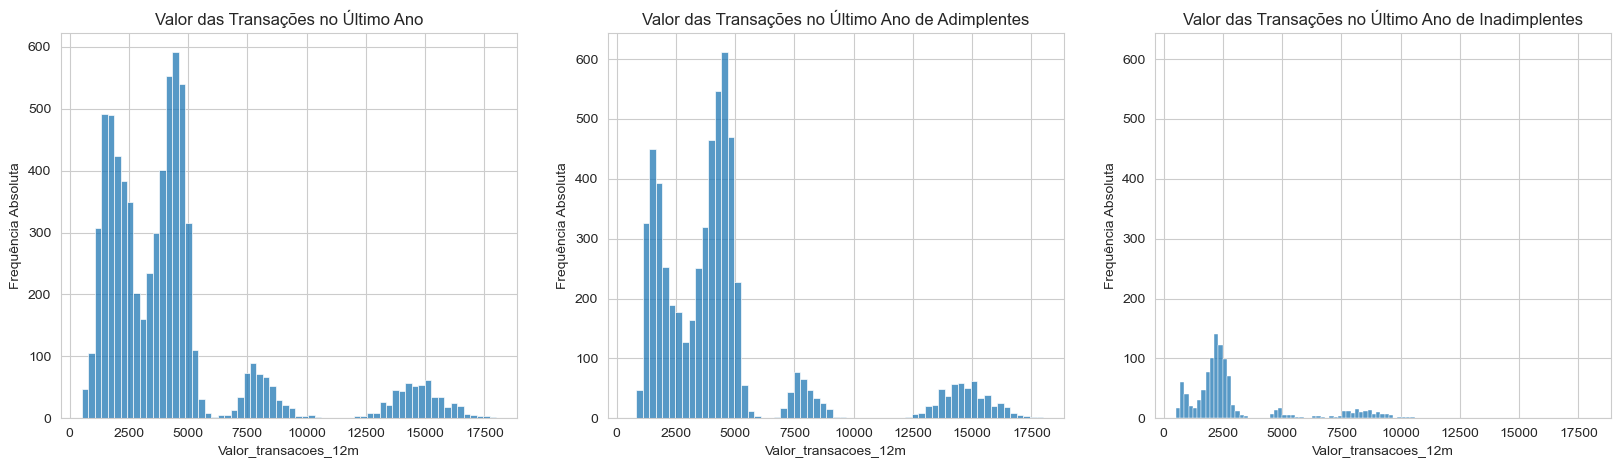

In [55]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Quando puxei o valor das transações, pude notar que as transações próximas á 2.500 são as mais presentes, ou seja, clientes inadimplentes tão mostrando um padrão de comportamento no qual, dentre os últimos 12 meses, muito próximo de 2,5k.

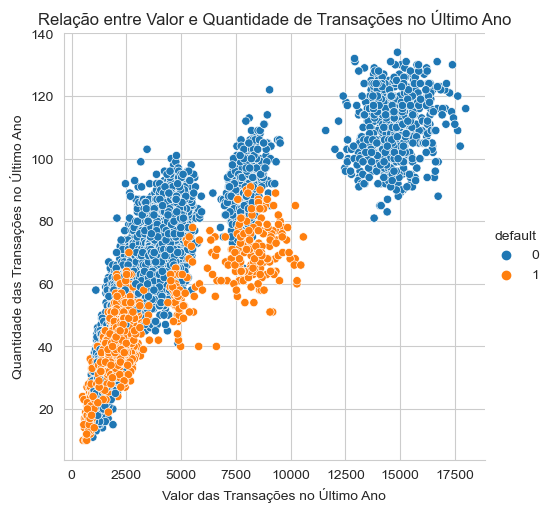

In [58]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

Finalmente, a partir da relação entre valor das transações e quantidades de transações anuais, podemos verificar que existem dois grupos predominantes, que são: 1)Quantidade até 60k anuais X Valor de transações de 3.5k, aproximadamente. 2)Quantidade entre 75k e 100k anuais X Valor de transações entre 7.5k e 10k, aproximadamente.


### Irei analisar alguns parâmetros, pela regressão linear, utilizando um intervalo de confiança de 95%: ###

C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\3874675634.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)
C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\3874675634.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)
C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\3874675634.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)


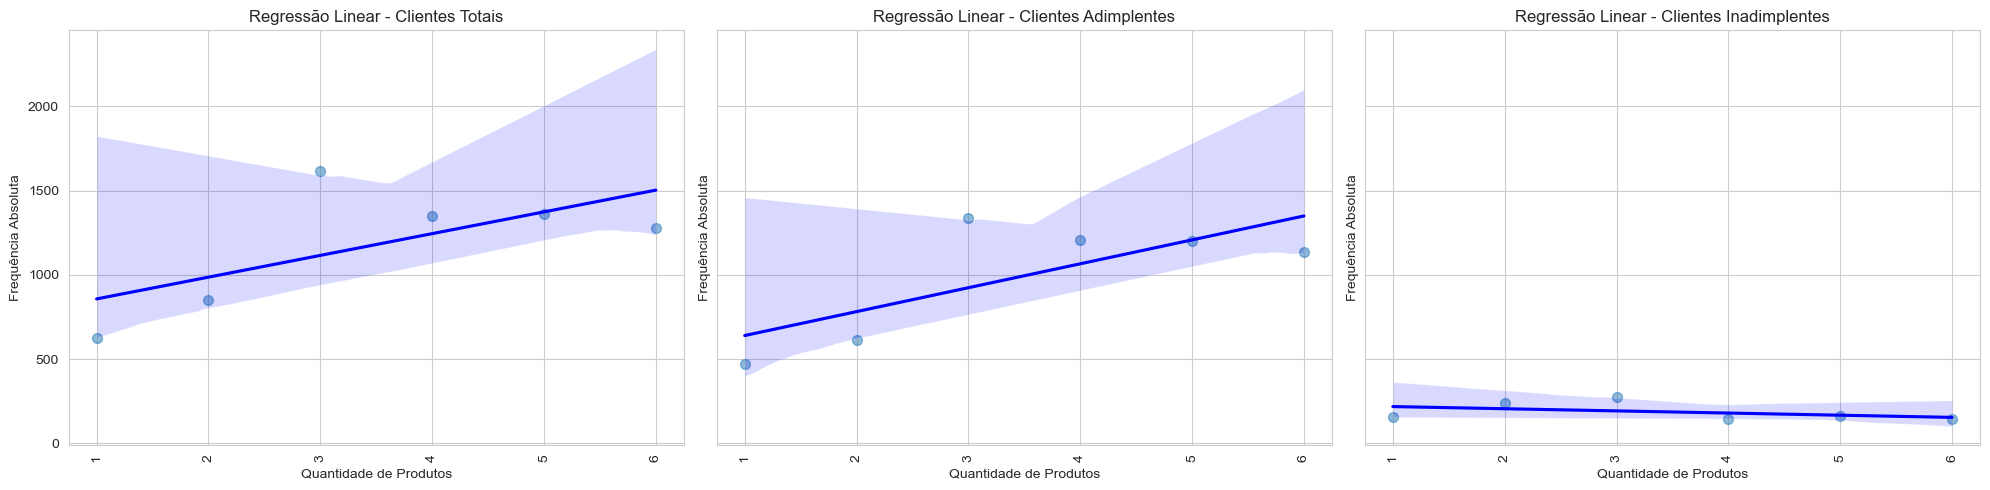

In [62]:
# O primeiro parâmetro, será a quantidade de produtos
titulos = ['Regressão Linear - Clientes Totais', 'Regressão Linear - Clientes Adimplentes', 'Regressão Linear - Clientes Inadimplentes']

coluna_x = 'qtd_produtos'
coluna_y = 'frequencia_absoluta'

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)


for eixo, dataframe, titulo in zip(eixos, [df, df_adimplentes, df_inadimplentes], titulos):
    # Contar a frequência absoluta de cada quantidade de produtos
    df_to_plot = dataframe[coluna_x].value_counts().reset_index()
    df_to_plot.columns = [coluna_x, coluna_y]
    df_to_plot.sort_values(by=[coluna_x], inplace=True)
    
    # Criar o gráfico de regressão linear
    sns.regplot(data=df_to_plot, x=coluna_x, y=coluna_y, ax=eixo, ci=95, scatter_kws={"s": 50, "alpha": 0.5}, line_kws={"color": "blue"})
    eixo.set(title=titulo, xlabel='Quantidade de Produtos', ylabel='Frequência Absoluta')
    eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Como estou trabalhando sempre com duas variáveis, uma regressão linear simples pode ser útil como um instrumento estatístico para, simplesmente, resumir dados, informações e calcular ou atribuir probabilidades entre as variáveis. Irei testar se a regração linear, com intervalo de confiança de 95%, pode nos mostrar algo entre a quantidade de produtos e a frequência absoluta da base de dados:

C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\3526464175.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)
C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\3526464175.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)
C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\3526464175.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)


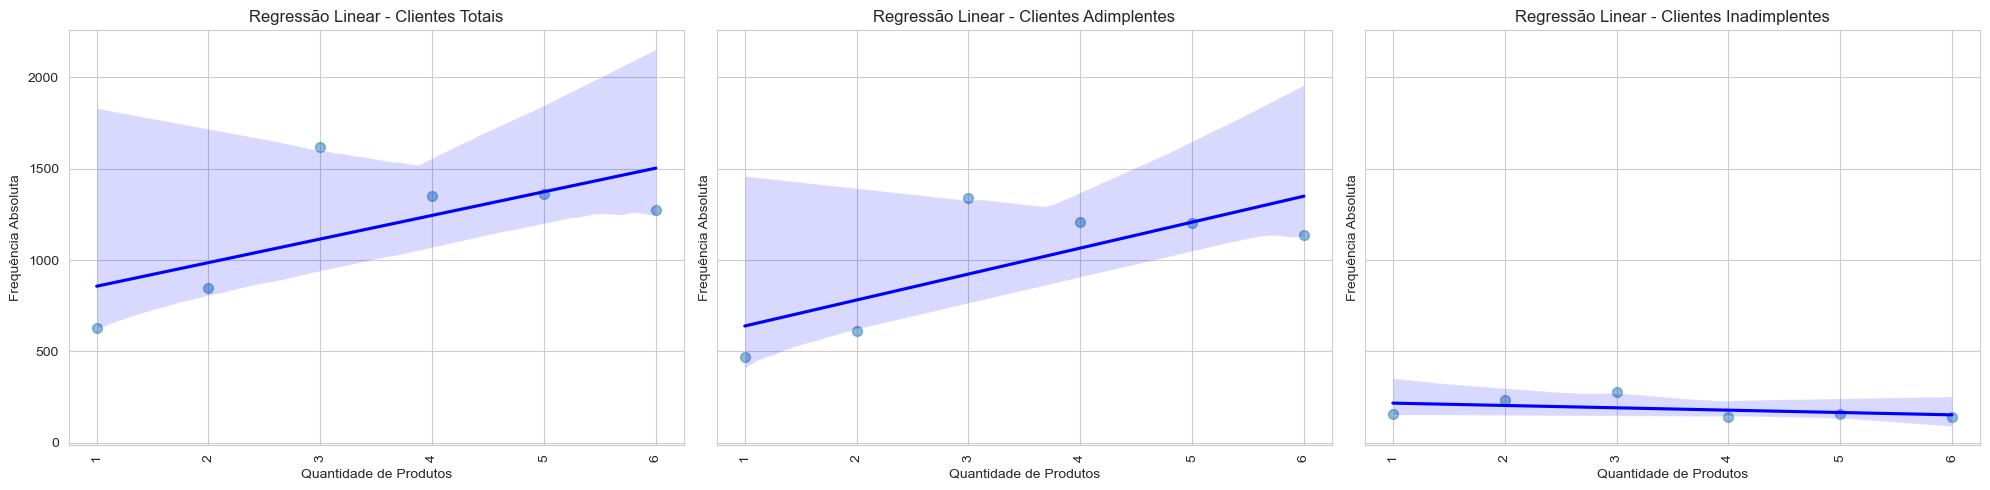

In [65]:
titulos = ['Regressão Linear - Clientes Totais', 'Regressão Linear - Clientes Adimplentes', 'Regressão Linear - Clientes Inadimplentes']

# Definir as colunas
coluna_x = 'qtd_produtos'
coluna_y = 'frequencia_absoluta'

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)

# Criar os gráficos de regressão linear
for eixo, dataframe, titulo in zip(eixos, [df, df_adimplentes, df_inadimplentes], titulos):
    # Contar a frequência absoluta de cada quantidade de produtos
    df_to_plot = dataframe[coluna_x].value_counts().reset_index()
    df_to_plot.columns = [coluna_x, coluna_y]
    df_to_plot.sort_values(by=[coluna_x], inplace=True)

    # Criar o gráfico de regressão linear
    sns.regplot(data=df_to_plot, x=coluna_x, y=coluna_y, ax=eixo, ci=95, scatter_kws={"s": 50, "alpha": 0.5}, line_kws={"color": "blue"})
    eixo.set(title=titulo, xlabel='Quantidade de Produtos', ylabel='Frequência Absoluta')
    eixo.set_xticklabels(labels=eixo.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

### Pude notar que os grupos de clientes inadimplentes que possuem 2, 4 e 6 produtos estão deslocados em relação à média, ou seja, isso pode significar um ponto de atenção na análise.


G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
G:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suporte\AppData\Local\Temp\ipykernel_38676\2145330460.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


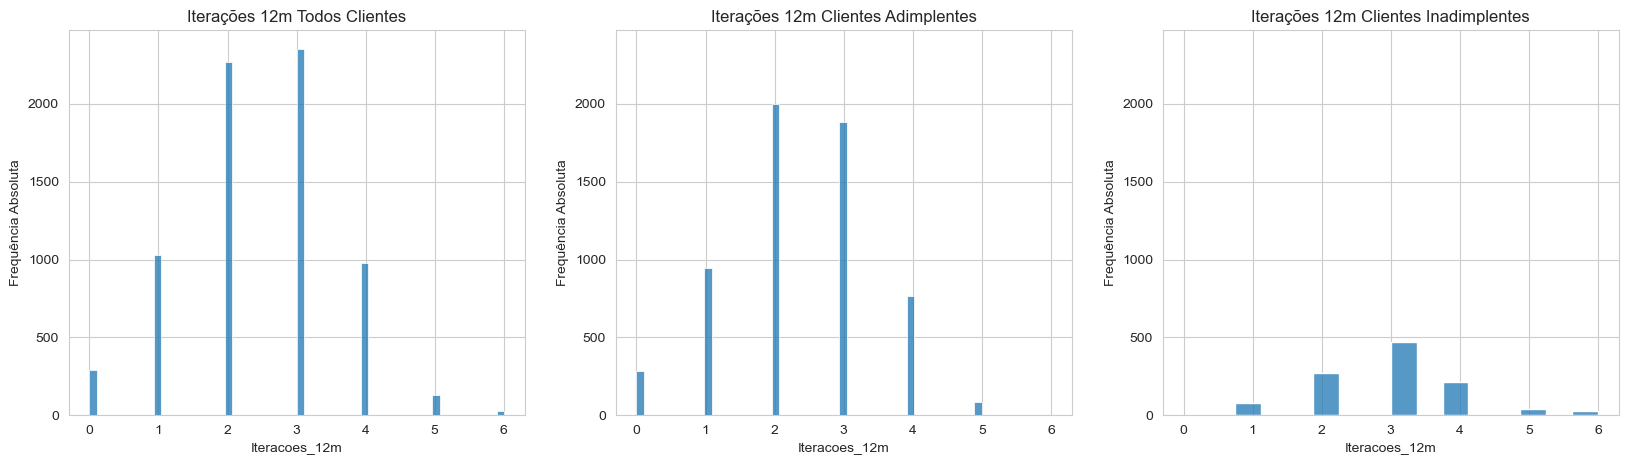

In [68]:
# Relação entre iterações dos clintes e Inadimplencia

coluna = 'iteracoes_12m'
titulos = ['Iterações 12m Todos Clientes', 'Iterações 12m Clientes Adimplentes', 'Iterações 12m Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplentes, df_inadimplentes]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

A partir do gráfico, podemos perceber, assim como na regressão linear, que á um descolamento da média entre os clientes com 3 iterações. Isso pode ser um 'hot-spot', ou ponto de atenção. Irei analisar mais as iterações a seguir:

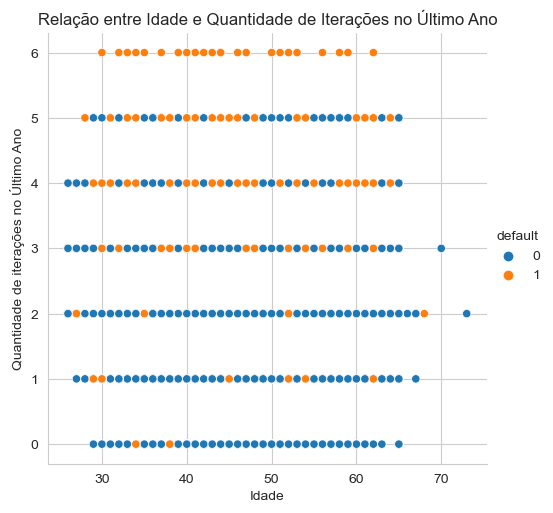

In [71]:
f = sns.relplot(x='idade', y='iteracoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Idade e Quantidade de Iterações no Último Ano', 
    xlabel='Idade', 
    ylabel='Quantidade de iterações no Último Ano'
  )

Quando ligamos as iterações com a idade dos clintes, é possível notar que os clientes entre 40 e 50 anos e com 4 iterações são maioria, indicando outro ponto de atenção.

### Conclusões: ###

Relembrando as variáveis analisadas e os grupos de atanção: A) Clientes com ganhos até 60k anuais X Clientes com gastos até 3,5k mensais são mais propensos a se tornarem inadimplentes;
B) Clientes com quantidade entre 75k e 100k anuais X Clientes com valor de transações entre 7.5k e 10k, aproximadamente;

C) Clientes inadimplentes com dois, quatro ou seis produtos, estão mais descolados em relação a média de clientes totais e de clientes adimplentes;

D) Clientes entre 40 e 50 anos, com 4 iterações também possuem maior propensão a se tornar inadimplentes.

### Resumo dos insigths: ###

Podemos notar que os clientes com renda anual menor que 60 mil e maior quantidade de produtos podem se tornar inadimplentes com maior facilidade, talvez pela falta de recurso financeiro, educação financeira ou controle de gastos pessoais, visto que o acesso ao crédito acaba sendo muito fácil.

Estatisticamente, segundo nossa base de dados, existe a chance de 16% de qualquer cliente se tornar inadimplente, ou seja, a cada 100 clientes, 16 serão inadimplentes, porém, conforme avaliado no decorrer da análise, temos quatro grupos em que a chance de se tornar inadimplente é maior.

Hipóteses: 1) Caso o cliente se enquadre em, pelo menos dois, dos três campos, é preciso ter uma atenção mais direcionada, pois fazem parte dos dois grupos que com maior inadimplencia.

2) Caso o clientes pertança em apenas um dos grupos, a regressão linear pode ser uma ferramenta utilizada para calcular a probabilidade de inadimplencia em relação à duas variáveis. (No exemplo, utilizei a quatidade de produtos e pude notar uma distorção, mesmo que sutil, nos clientes inadimplentes.)

3) Mesmo que o clientes não se enquadre em nenhum dos campos analisados, não significa que o risco de se tornar inadimplente é zero, e o mesmo vale caso o clientes faça parte dos grupos analisados, não significa que ele será inadimplente.

Melhorias de políticas de crédito:

1°) Dificultar, pelo menos um pouco, o acesso ao crédito para os clientes mais recentes, estudar como cada cliente se comporta em relação aos seus gastos e, aos poucos, liberar maiores limites de crédito para o mesmo.

2°) Seguindo a mesma lógica do primeiro exemplo, acredito que liberar um limite mensal de no máximo um salário mensal do cliente, seja uma forma de controlar e previnir a inadimplencia dos clientes, visto que, caso o cliente gaste mais do que ganhe, obviamente ele não conseguirá arcar com o custo da fatura do cartão.

3°) Acordos mais amigáveis e com maiores possibilidades de negociação. Clientes inadimplentes sempre irão existir, então algo interessante de se implantar, são ferramentes e acordos com mais opções de negociação, como o valor mínimo de pagamente da fatura e o parcelamente do restante do saldo devedor.

4°) 10% de alguma coisa é melhor que 100% de nada. Caso o cliente não consiga efetuar o pagamente de forma alguma, oferecer possibilidades de negociação da dívida, taxa de juros e número de parcelas é um atrativo simples, que pode ser automatizado, dando ao clientes algumas opções de pagamente parcelado, com uma extensão maior das parcelas da dívida.

Futuras investigações:
1°) O primordial para combater a inadimplencia, efetivamente, é uma área de educação financeira e controle de gastos. Com uma simples planilha de gastos, um ebook sobre educação financeira ou uma área, propriamente dita, onde, caso os clientes começem a dar indícios de inadimplencia (como atrasar o pagamento da fatura, elevar muito o gasto no cartão repentinamente ou parcelar o pagamento da fatura), é necessário entrar em contato com o mesmo e tentar entender a auxiliar para resolver a situação.

2°) Políticas mais rígidas de acesso ao crédito ou menores limites de crédito.

3°) Conforme o tempo passa, mais dados são gerados, oque facilita a análise e a precisão dos calculos em relação ao risco de crédito. Uma boa área de estatística e analise de dados é essencial para ajudar a prevenção da inadimplencia.